# Assignment #3

# 1. K-means from scratch (25 points)

Code up the K-means algorithm. To test your code, sample from the three bivariate Gaussian distributions provided below and find three clusters from this sampled data. To initialize your algorihtm, you may use the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot similar to the one shown below. For consistency, set the random seed to 1 before sampling from the three bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
3.0\\
0.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-6.0\\
3.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
-2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \mathbf{\Sigma_3} = \begin{bmatrix}
1.0&0.5\\
0.5&1.0\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

$$\mathbf{c_3} = \begin{bmatrix}
-2.0\\
2.0\\
\end{bmatrix}$$

* Example of final scatter plot

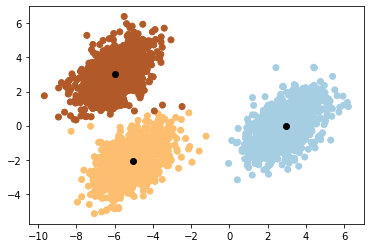

In [1]:
import numpy as np
import matplotlib.pyplot as plt

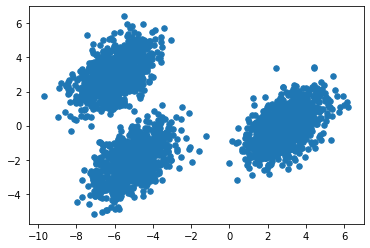

In [2]:
np.random.seed(1)

#mean value
mean1 = np.array([3.0,0.0])
mean2 = np.array([-6.0,3.0])
mean3 = np.array([-5.0,-2.0])
#covariance
cov1 =  cov2 = cov3 = np.array([[1.0,0.5],[0.5,1.0]])
#data
X1 = np.random.multivariate_normal(mean1,cov1,1000)
X2 = np.random.multivariate_normal(mean2,cov2,1000)
X3 = np.random.multivariate_normal(mean3,cov3,1000)
X = np.concatenate((X1,X2,X3),axis=0)
#centroids
center = np.array([[0.4,0.3],[0.1,0.4],[-2.0,2.0]])

plt.scatter(X[:,0],X[:,1],s=30)
plt.show()

In [ ]:
#K means from scratch
cluster=np.zeros(X.shape[0])
train=1000
for i in range(train):
    clustered_points = [[]for _ in range(len(center))]
    for j in range(X.shape[0]):
        dist=np.zeros(len(center))
        for k in range(len(center)):
            dist[k]=((X[j][0]-center[k][0])**2 + (X[j][1]-center[k][1])**2)**0.5
            cluster[i]=np.argmin(dist)
            clustered_points[int(cluster[j])].append(X[j])
    for j in range(len(center)):
        new_center=np.mean(np.array(clustered_points[j]),axis=0)
        center[j]=new_center

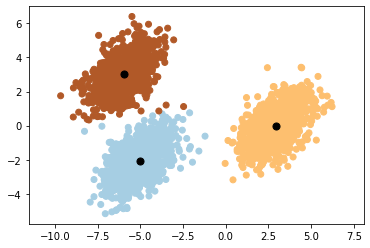

In [4]:
#plot figure
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=cluster, cmap=plt.get_cmap('Paired'))
plt.scatter(center[:,0],center[:,1], c='k', s=50)
plt.axis('equal')
plt.show()

# 2. Choosing the appropriate clustering approach (25 points)

The file `/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif` is a map of lakes in the bounding box minlon = -96, maxlon = -95.9, minlat = 46.4, and maxlat = 46.5 at a 30 meter spatial resolution. All pixels that belong to a lake are assigned 1 while every pixel that is not part of a lake is set to 0. In this problem we will use cluster analysis to group together contiguous pixels to uniquely define all the lakes in the map. 

**A.** After reading in and preprocessing the data for use in cluster analysis, use the following cluster algorithms with the given associated parameters to cluster the data:


    * Agglomerative Clustering with single linkage (n_clusters=25)
    * DBSCAN (eps = 5, min_samples = 10)
    * K-Means (n_clusters = 25)
    * Gaussian Mixture Model (n_components = 25)


**B.** Provide a scatter plot of the results of each algorithm. The color of each point on the scatter plot should be associated with a cluster. 


**C.** Discuss the results with an emphasis on explaining the strengths and deficiencies of each algorithm in the context of clustering the lakes. 


**D.** Having clustered the pixels into unique lakes, compute and report the mean and standard deviation of the area of the lakes. 

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import mixture

### Part A

In [2]:
#data for different algorithms
data={}

with rasterio.open('/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif') as fp:
    data['lakes']=fp.read(1)
    lons=np.linspace(fp.bounds.left+fp.res[0]/2,fp.bounds.right-fp.res[0]/2,data['lakes'].shape[1])
    lats=np.linspace(fp.bounds.bottom+fp.res[1]/2,fp.bounds.top-fp.res[1]/2,data['lakes'].shape[0])
    (lons,lats)=np.meshgrid(lons,lats)
    data['lon']=lons[:]
    data['lat']=np.flipud(lats[:])
    data['lon']=(data['lon']-np.min(data['lon']))/(np.max(data['lon'])-np.min(data['lon']))
    data['lat']=(data['lat']-np.min(data['lat']))/(np.max(data['lat'])-np.min(data['lat']))
    
dataset=[]
for i in range(data['lakes'].shape[0]):
    for j in range(data['lakes'].shape[1]):
        if data['lakes'][i][j]==1:
            dataset.append(np.array([data['lon'][i][j],data['lat'][i][j]]))
X=np.array(dataset)

In [7]:
#1 Agglomerative Clustering with single linkage (n_clusters=25)
k=25
model_1=cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
cluster_1=model_1.fit_predict(X)

#2 DBSCAN (eps = 5, min_samples = 10)
model_2=cluster.DBSCAN(eps=0.01,min_samples=10)
cluster_2=model_2.fit_predict(X)

#3 K-Means (n_clusters = 25)
k=25
model_3=cluster.KMeans(n_clusters=k)
model_3.fit(X)
cluster_3=model_3.predict(X)

#4 Gaussian Mixture Model (n_components = 25)
k=25
model_4=mixture.GaussianMixture(n_components=k)
model_4.fit(X)
cluster_4=model_4.predict(X)


#DBSCAN model with eps change
model_a=cluster.DBSCAN(eps=5,min_samples=10)
cluster_a=model_a.fit_predict(X)

model_b=cluster.DBSCAN(eps=0.1,min_samples=10)
cluster_b=model_b.fit_predict(X)

model_c=cluster.DBSCAN(eps=0.05,min_samples=10)
cluster_c=model_c.fit_predict(X)

model_d=cluster.DBSCAN(eps=0.01,min_samples=10)
cluster_d=model_d.fit_predict(X)

### Part B

Text(0, 0.5, 'latitude')

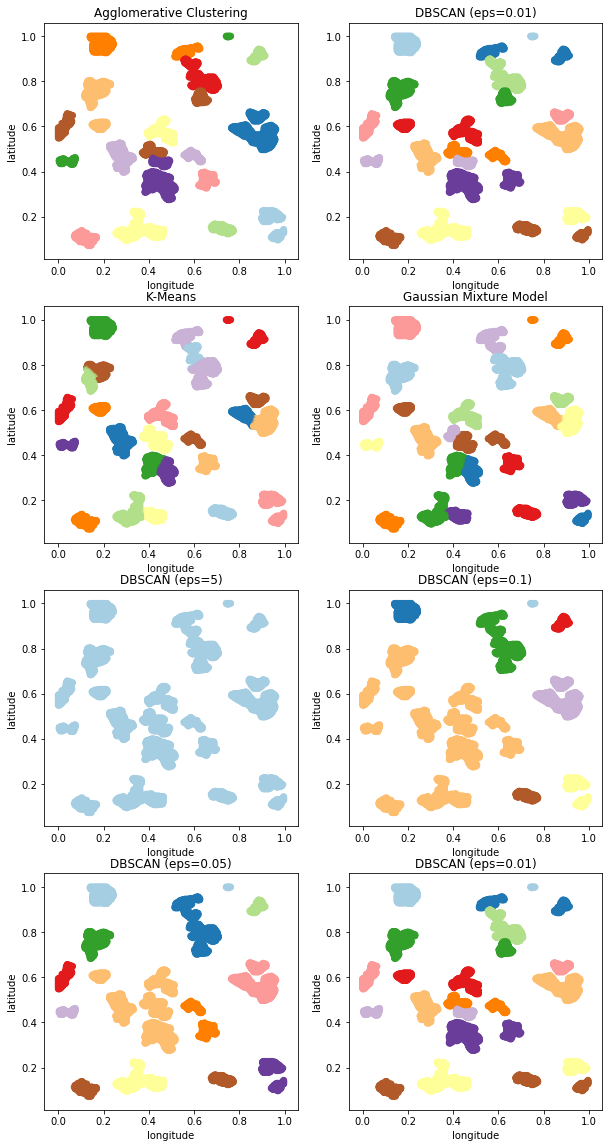

In [24]:
#plot
fig,axs=plt.subplots(4,2,figsize=(10,20))
#1 Agglomerative Clustering with single linkage (n_clusters=25)
axs[0,0].scatter(X[:,0],X[:,1],c=cluster_1,cmap=plt.get_cmap('Paired'))
axs[0,0].set_title('Agglomerative Clustering')
axs[0,0].set_xlabel('longitude')
axs[0,0].set_ylabel('latitude')
#2 DBSCAN (eps = 0.01, min_samples = 10)
axs[0,1].scatter(X[:,0],X[:,1],c=cluster_2,cmap=plt.get_cmap('Paired'))
axs[0,1].set_title('DBSCAN (eps=0.01)')
axs[0,1].set_xlabel('longitude')
axs[0,1].set_ylabel('latitude')
#3 K-Means (n_clusters = 25)
axs[1,0].scatter(X[:,0],X[:,1],c=cluster_3,cmap=plt.get_cmap('Paired'))
axs[1,0].set_title('K-Means')
axs[1,0].set_xlabel('longitude')
axs[1,0].set_ylabel('latitude')
#4 Gaussian Mixture Model (n_components = 25)
axs[1,1].scatter(X[:,0],X[:,1],c=cluster_4,cmap=plt.get_cmap('Paired'))
axs[1,1].set_title('Gaussian Mixture Model')
axs[1,1].set_xlabel('longitude')
axs[1,1].set_ylabel('latitude')

#DBSCAN with eps change
#1 
axs[2,0].scatter(X[:,0],X[:,1],c=cluster_a,cmap=plt.get_cmap('Paired'))
axs[2,0].set_title('DBSCAN (eps=5)')
axs[2,0].set_xlabel('longitude')
axs[2,0].set_ylabel('latitude')
#2 
axs[2,1].scatter(X[:,0],X[:,1],c=cluster_b,cmap=plt.get_cmap('Paired'))
axs[2,1].set_title('DBSCAN (eps=0.1)')
axs[2,1].set_xlabel('longitude')
axs[2,1].set_ylabel('latitude')
#3
axs[3,0].scatter(X[:,0],X[:,1],c=cluster_c,cmap=plt.get_cmap('Paired'))
axs[3,0].set_title('DBSCAN (eps=0.05)')
axs[3,0].set_xlabel('longitude')
axs[3,0].set_ylabel('latitude')
#4
axs[3,1].scatter(X[:,0],X[:,1],c=cluster_d,cmap=plt.get_cmap('Paired'))
axs[3,1].set_title('DBSCAN (eps=0.01)')
axs[3,1].set_xlabel('longitude')
axs[3,1].set_ylabel('latitude')

### Part C

Based on the plot we generated, the Agglomerative Clustering provides the most clear clustering. There are still some closely entached lakes not separated, but clustered most lakes without cutting one into pieces.

DBSCAN clustering also grouped the lakes with irregular shape as one, but if we apply the eps value given in the question (=5), the clustering will fail due to the radius range, and count all points as one cluster. With the decreasing radius size, the DBSCAN procides more specific result. 

K-Means and Gaussian Mixture model provides good result on speherical or similiar shaped lakes, but will cluster the irregular ones as multiple different clusters.

### Part D

In [22]:
pixel_size=30*30
#1 Agglomerative Clustering
unique=np.unique(cluster_1)
area=np.zeros(unique.shape[0])
for i in cluster_1:
    area[i] += pixel_size
mean_1=np.mean(area)
std_1=np.std(area)
#2 DBSCAN
unique=np.unique(cluster_2)
area=np.zeros(unique.shape[0])
for i in cluster_2:
    area[i] += pixel_size
mean_2=np.mean(area)
std_2=np.std(area)
#3 K-Mean
unique=np.unique(cluster_3)
area=np.zeros(unique.shape[0])
for i in cluster_3:
    area[i] += pixel_size
mean_3=np.mean(area)
std_3=np.std(area)
#4 Gaussian Mixture
unique=np.unique(cluster_4)
area=np.zeros(unique.shape[0])
for i in cluster_1:
    area[i] += pixel_size
mean_4=np.mean(area)
std_4=np.std(area)

print('For Agglomerative Clustering, the mean is:',mean_1,'m^2,standard deviation is:'+'{:.2f}'.format(std_1),'m^2')
print('For DBSCAN Clustering, the mean is:',mean_2,'m^2,standard deviation is:'+'{:.2f}'.format(std_2),'m^2')
print('For K-Mean Clustering, the mean is:',mean_3,'m^2,standard deviation is:'+'{:.2f}'.format(std_3),'m^2')
print('For Gaussian Mixture Clustering, the mean is:',mean_4,'m^2,standard deviation is:'+'{:.2f}'.format(std_4),'m^2')


For Agglomerative Clustering, the mean is: 308592.0 m^2,standard deviation is:227251.03 m^2
For DBSCAN Clustering, the mean is: 308592.0 m^2,standard deviation is:227251.03 m^2
For K-Mean Clustering, the mean is: 308592.0 m^2,standard deviation is:135390.95 m^2
For Gaussian Mixture Clustering, the mean is: 308592.0 m^2,standard deviation is:227251.03 m^2


# 3. Predicting soil taxonomy (50 pts)

In the United States, soils are classified using the [USDA soil taxonomy](https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_051232.pdf). Within the USDA soil taxonomy, the most general level is the taxonomic order. In this problem we will be using a suite of decision-tree based classification algorithms to create spatial maps of taxonomic order over western Illinois. The point observations come from the [NASIS database](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/tools/?cid=nrcs142p2_053552) while the environmental predictors come from Sentinel 2, the National Elevation Data, and the National Land Cover database.

All the data has already been subsetted and preprocessed and are available in the following NetCDF file `/data/HW/HW3/HW3.nc`. The file is split into two groups: predictors and observations. The predictors group contains a set of 1 arcsec maps for the domain and the observations group contains the in-situ taxonomic order observations with their associated geographic coordinates. Although not required, we recommend using xarray to read in these data. 

**A.** Read in and create maps of all the predictors. Describe any apparent discrepancies in spatial resolution between the maps.

**B.** Read in the in-situ observations and assemble the corresponding predictors for each site. Create the $\mathbf{X}$ array of predictors and the $\mathbf{y}$ array of observed taxonomic orders. Note that you will need to convert the taxonomic order names to integers.

**C.** Use the validation set approach to divide your data into training and test datasets. Each dataset should contain 50% of the data. Then fit a Decision tree using the training data and evaluate its accuracy for both the training and test datasets. Explain the differences in accuracy when evaluating the training and test datasets. To ensure reproduceability, when initializing the decision tree, set the random_state to 1.

**D.** Using  all the site data, perform a 10-fold cross validation of the decision tree and compare the results to the previous exercise. Set random_state to 1 and set shuffle to True.

**E.** Setting the number of decision trees to 100, perform a 10-fold cross validation using Bagging, Random Forests, and Gradient Boosting. Discuss how the results of these different ensemble methods vary amongst themselves. Also compare the results to those obtained from a single decision tree. Remember to set random_state to 1.

**F.** Using 100 trees, fit a Random Forest to the entire sites dataset and report the out of bag score. Compare that result to that obtained from the cross validation. Explain what the out of bag score is and how it can be more useful than cross validation. Remember to set random_state to 1.

**G.** Iterate through the number of decision trees varying from 1 to 100 in 1 tree increments. For each iteration, fit a Random Forest and append the corresponding out of bag score to a list. Plot the out of bag score as a function of the number of decision trees. What do you learn about the optimal number of trees for this problem?

**H.** After fitting a random forest with 100 trees, plot a map of the entire region of the predicted taxonomy order.

#### Part A

In [25]:
%%bash
ncdump -h /data/HW/HW3/HW3.nc

netcdf HW3 {

group: observations {
  dimensions:
  	site = 153 ;
  variables:
  	double lat(site) ;
  	double lon(site) ;
  	string taxonomic_order(site) ;
  } // group observations

group: predictors {
  dimensions:
  	lat = 1080 ;
  	lon = 1080 ;
  variables:
  	double lat(lat) ;
  	double lon(lon) ;
  	float elevation(lat, lon) ;
  	float ndvi(lat, lon) ;
  	float evi(lat, lon) ;
  	float red(lat, lon) ;
  	float green(lat, lon) ;
  	float blue(lat, lon) ;
  	float tree_cover_fraction(lat, lon) ;
  	float gamma_uranium(lat, lon) ;
  	float gamma_thorium(lat, lon) ;
  	float gamma_potassium(lat, lon) ;
  } // group predictors
}


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import warnings
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
warnings.filterwarnings('ignore',category=RuntimeWarning)
warnings.filterwarnings('ignore',category=UserWarning)

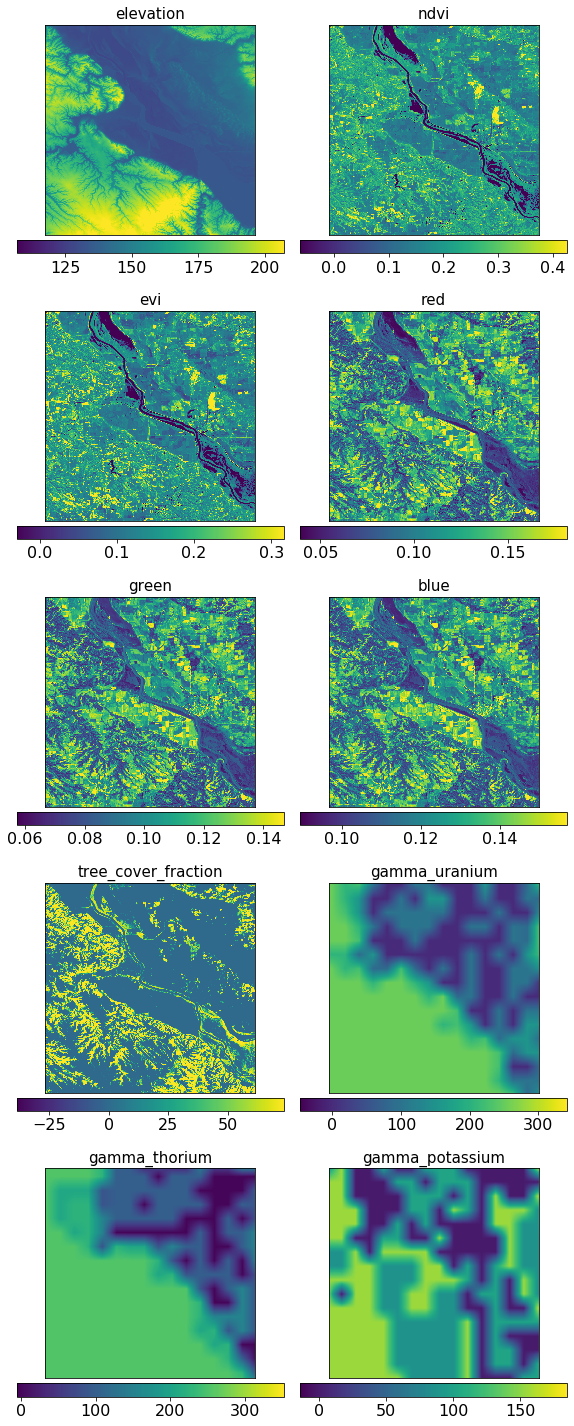

In [53]:
variables=['lat','lon','elevation','ndvi','evi','red','green','blue','tree_cover_fraction','gamma_uranium','gamma_thorium','gamma_potassium']

data={}
for var in variables:
    with xr.open_dataset('/data/HW/HW3/HW3.nc',group='predictors') as fp:
        data[var]=fp[var]
        
plt.figure(figsize=(8,20))
i=1
for var in data:
    if var in ['lat','lon']:
        continue
    plt.subplot(5,2,i)
    i+=1
    plt.xticks([])
    plt.yticks([])
    vmin=np.mean(data[var])-2*np.std(data[var])
    vmax=np.mean(data[var])+2*np.std(data[var])
    plt.imshow(data[var],vmin=vmin,vmax=vmax)
    cb=plt.colorbar(orientation='horizontal',pad=0.02)
    cb.ax.tick_params(labelsize=16)
    plt.title(var,fontsize=15)
plt.tight_layout()
plt.show()

Based on obeservation, $\gamma$ uranium, $\gamma$ thorium and $\gamma$ potassium have significant resolution difference to the other factors.

#### Part B

In [54]:
variables_observ=['lat','lon','taxonomic_order']

observation={}
for var in variables_observ:
    with xr.open_dataset('/data/HW/HW3/HW3.nc',group='observations') as fp:
        observation[var]=fp[var]
y=[]
label={}
tax_unique=np.unique(observation['taxonomic_order'])
for i in range(tax_unique.shape[0]):
    label[tax_unique[i]]=i+1
for order in observation['taxonomic_order'].values:
    y.append(label[order])
y=np.array(y)

predictors=variables[2:]
with xr.open_dataset('/data/HW/HW3/HW3.nc',group='predictors') as fp:
    features=[]
    for predictor in predictors:
        feature=fp[predictor].sel(lat=observation['lat'],lon=observation['lon'],method='nearest').values
        features.append(feature)
X=np.array(features).T

print(X.shape,y.shape)

(153, 10) (153,)


#### Part C

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,shuffle=False)
dt_clf=DecisionTreeClassifier(random_state=1)
dt_clf=dt_clf.fit(X_train,y_train)

train_accuracy=dt_clf.score(X_train,y_train)*100
test_accuracy=dt_clf.score(X_test,y_test)*100
print('Train accuracy is '+'{:.2f}'.format(train_accuracy),'%')
print('Test accuracy is '+'{:.2f}'.format(test_accuracy),'%')

Train accuracy is 98.68 %
Test accuracy is 55.84 %


The training accuracy is significantly higher than the test accuracy, so the model is over fitted. It could be caused by the 50/50 training/testing size.(The training set should be larger to verify)

#### Part D

In [56]:
X_train,y_train=shuffle(X,y)
dt_clf_cv=DecisionTreeClassifier(random_state=1)
cv_scores=cross_val_score(dt_clf_cv,X_train,y_train,cv=10)

cv_accuracy=np.mean(cv_scores)*100
print('Cross validation accuracy is '+'{:.2f}'.format(cv_accuracy),'%')

Cross validation accuracy is 66.93 %


The cross validation accuracy is in the range between train and test accuracy, which is a normal value.

#### Part E

In [57]:
#1 Bagging
df_clf=DecisionTreeClassifier(random_state=1)
bag_clf=ensemble.BaggingClassifier(base_estimator=df_clf,n_estimators=100)
bag_score=cross_val_score(bag_clf,X_train,y_train,cv=10)
bag_accuracy=np.mean(bag_score)*100
#2 Random Forest
rf_clf=ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
rf_score=cross_val_score(rf_clf,X_train,y_train,cv=10)
rf_accuracy=np.mean(rf_score)*100
#3 Gradient Boosting
gb_clf=ensemble.GradientBoostingClassifier(n_estimators=100,random_state=1)
gb_score=cross_val_score(gb_clf,X_train,y_train,cv=10)
gb_accuracy=np.mean(gb_score)*100
print('Bagging CV accuracy is '+'{:.2f}'.format(bag_accuracy),'%')
print('Random Forest CV accuracy is '+'{:.2f}'.format(rf_accuracy),'%')
print('Gradient Boosting CV accuracy is '+'{:.2f}'.format(gb_accuracy),'%')

Bagging CV accuracy is 72.82 %
Random Forest CV accuracy is 74.02 %
Gradient Boosting CV accuracy is 74.24 %


Random Forest has the highest accuracy in the three methods.

All three methods have higher accuracy than single cross validation method. 

#### Part F

In [58]:
rf_clf_ob=ensemble.RandomForestClassifier(n_estimators=100,random_state=1,oob_score=True)
rf_clf_ob.fit(X_train,y_train)

print('Out of bag score is '+'{:.2f}'.format(rf_clf_ob.oob_score_))

Out of bag score is 0.75


The out of bag score evaluates only the trees that's been omitted when calculating accuracy. It reduced the overall aggregation effect of bagging, and is more affordable.

#### Part G

In [67]:
max_oob,optim = 0,0
trees=range(1,101)
oob_score=[]

for n in trees:
    rf_clf=ensemble.RandomForestClassifier(n_estimators=n,random_state=1,oob_score=True)
    rf_clf.fit(X_train,y_train)
    score=rf_clf.oob_score_
    oob_score.append(score)
    if(score>max_oob):
        max_oob=score
        optim=n

Text(0, 0.5, 'out of bag score')

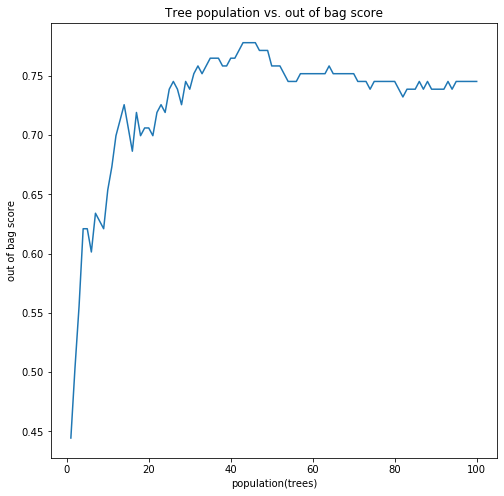

In [68]:
plt.figure(figsize=(8,8))
plt.plot(trees,oob_score)
plt.title('Tree population vs. out of bag score')
plt.xlabel('population(trees)')
plt.ylabel('out of bag score')

In [69]:
print('Optimal number of trees for this problem is ',optim)

Optimal number of trees for this problem is  43


Based on the plot we generate above, the out of bag score increase while tree number increase, and reach the highest point at tree number = 43. After that, the oob score decreased a little bit and maintain constant between 0.70 to 0.75. Having more trees in the study may not increase the result performance.

#### Part H

In [71]:
rf_clf=ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
rf_clf.fit(X_train,y_train)

X_entire=[]
for key,val in data.items():
    if key in ['lat','lon']:
        continue
    X_entire.append(val.values.flatten())
X_entire=np.array(X_entire).T
y=rf_clf.predict(X_entire)
y=np.reshape(y,(1080,1080))

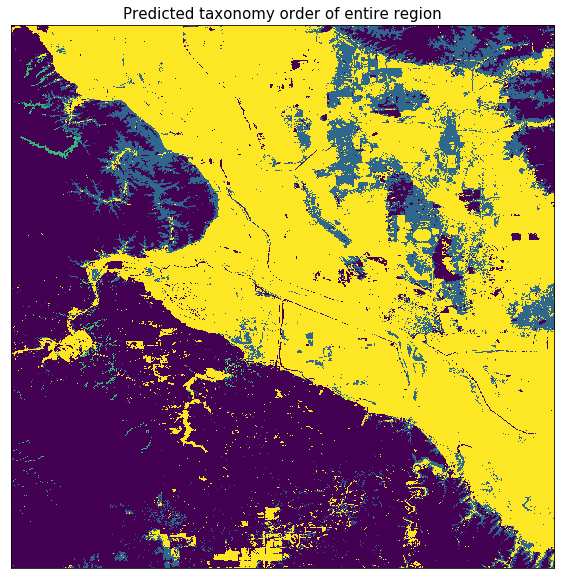

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(y)
plt.xticks([])
plt.yticks([])
plt.title('Predicted taxonomy order of entire region', fontsize=15)
plt.show()